# **TITLE OF PROJECT -- Mielage Prediction Regression Analysis**

# **OBJECTIVE:**
  to find the mielage by using some attributes

# **DATA SOURCE:**
  this dataset was taken from the StatLib library whixh uis maintained by Carnegie mellon Univesity.This data set was used in 1983 American Statistical Association exposition.

# **Import Library**

In [16]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import data
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv")

In [5]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [6]:
#Describe Data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# **DATA PREPROCESSING**

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [11]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# **REMOVING MISSING VALUES**

In [13]:
df=df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# **DATA VISUALIZATION**

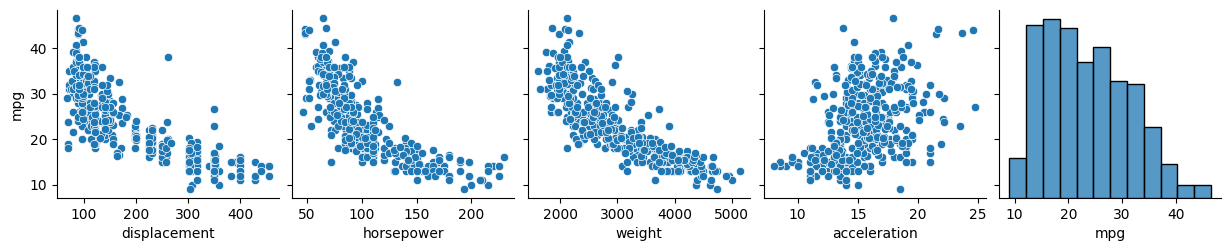

In [17]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

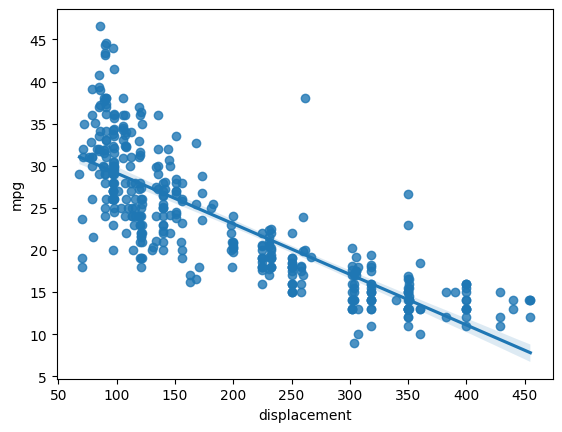

In [18]:
sns.regplot(x='displacement',y='mpg',data=df)

# **Define Target Variable (y) and Feature Variables (X)**

In [19]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [20]:
y=df['mpg']

In [21]:
y.shape

(392,)

In [22]:
x=df[['displacement','horsepower','weight','acceleration']]

In [23]:
x.shape

(392, 4)

# **Train Test Split**

In [24]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=345)

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_tesṭ.shape

((274, 4), (118, 4), (274,), (118,))

# **Modeling**

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model=LinearRegression()

In [31]:
model

LinearRegression()

# **Train the Data**

In [32]:
model.fit(x_train,y_train)

LinearRegression()

In [33]:
model.intercept_

47.29948967828986

In [34]:
model.coef_

array([-0.00181356, -0.0449188 , -0.00585572, -0.09410173])

# **Prediction**

In [35]:
y_pred=model.predict(x_test)

In [36]:
y_pred

array([26.04497212, 11.05820347, 24.21391475, 28.75102237, 12.28145381,
       17.08505498, 13.2210074 , 29.85966428, 21.72422058, 25.81262438,
       25.71601187, 13.80979668, 23.11496503, 20.88494232, 17.88374897,
       30.72898327, 14.38876305, 29.96492475, 25.93412365, 32.35576337,
       32.60537186, 30.18381144, 28.46330298, 21.2712716 , 28.28697232,
       26.68582947, 26.77358693, 28.89809591, 14.71324203, 25.00338542,
       30.7509926 , 16.84953462, 21.290855  , 22.55909421, 32.11394692,
       26.41931211, 30.70264342, 24.64373456, 16.54579741, 22.95599679,
       30.0321555 , 28.70292642, 11.56546311, 22.09908096, 31.66251932,
       27.90121598, 22.8410734 , 23.63614054, 22.95262495, 27.87510097,
       29.90607992, 19.65735987, 27.91687024, 23.18859041, 24.82925944,
       15.37599249, 17.16375201, 23.89379221, 26.73832584, 26.46229886,
       16.33666242, 25.89879845, 23.89475339, 19.03648419, 31.52376673,
       29.5362686 , 16.57521533, 30.80411099, 14.2261681 , 22.94

# **Model Evaluation**

In [37]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [40]:
mean_absolute_error(y_test,y_pred)

3.3578118805115005

In [41]:
mean_absolute_percentage_error(y_test,y_pred)

0.1404306735077225

In [42]:
r2_score(y_test,y_pred)

0.6560760570300387

# **Explaination**

# According model evaluation the above model has 86% accuracy